# **Problem definition:**
  The aim of this project is to develop a machine learning model that can predict the likelihood of an individual having heart disease based on various health-related features. The model will be trained on a dataset containing information such as age, gender, cholesterol levels, blood pressure, and other relevant factors. The primary objective is to create a reliable and accurate predictive tool that can assist in early identification and intervention for individuals at risk of heart disease, ultimately contributing to improved healthcare outcomes.

<font size="6px">**Installation**</font><br>
Here we install necessary modules for our projects.

1. <font size="5px">**Pandas :**</font><br>
      Pandas is a powerful data manipulation and analysis library. It will be used to load and manipulate the dataset.

2.  <font size="5px">**Numpy :**</font><br>
       NumPy is a fundamental package for scientific computing with Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.

3.  <font size="5px">**Matplotlib & Seaborn :**</font><br>
      Matplotlib is a widely used plotting library, and Seaborn is built on top of Matplotlib, providing additional features and a higher-level interface for statistical graphics. These libraries will be used for data visualization.

4.  <font size="5px">**Scikit-learn :**</font><br>
      Scikit-learn is a machine learning library that includes various tools for data preprocessing, modeling, and evaluation. It will be used for splitting the dataset, training models, and evaluating performance metrics.

*In google colab most of these modules are already installed*


In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

# **Data collection**
Here we importing all necessary package into our projects 💻

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


**Importing dataset for machine learning**

In [ ]:
dataset = "/content/drive/MyDrive/Colab Notebooks/heart_disease_dataset.csv"
df = pd.read_csv(dataset)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# **Data visualization**
This visualization helps us to understand the dataset.

***Visualize the distribution of the target variable***<br>


*   **'sns.countplot'** is a Seaborn function used to show the counts of observations in each category of a categorical variable. Here, it's used to visualize the distribution of the target variable ('target'), which indicates the presence or absence of heart disease (1 for presence, 0 for absence).

*   **'plt.title'** adds a title to the plot.

*   **'plt.show()'** displays the plot






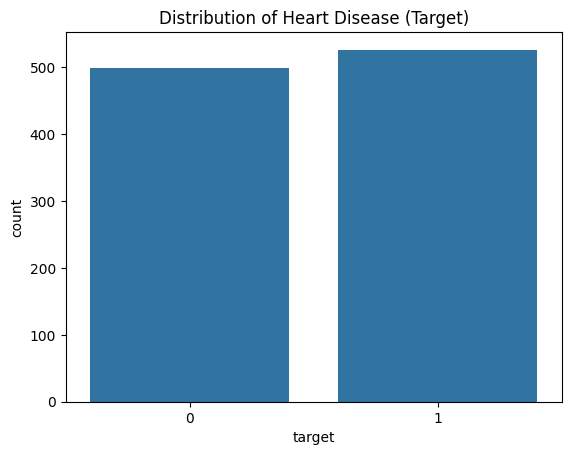

In [ ]:
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease (Target)')
plt.show()

***Visualize the distribution of age***


*   **'plt.figure()'** sets the size of the figure to be plotted.
*   **'sns.histplot'** is used to create a histogram of the **'age'** variable. The **'bins (intervals)'** parameter defines the number of intervals for the histogram, and **'kde=True'** adds a kernel density estimate curve to the plot.


<font color="#99ccff" size='5px'>*same applicable for below visualization*</font>



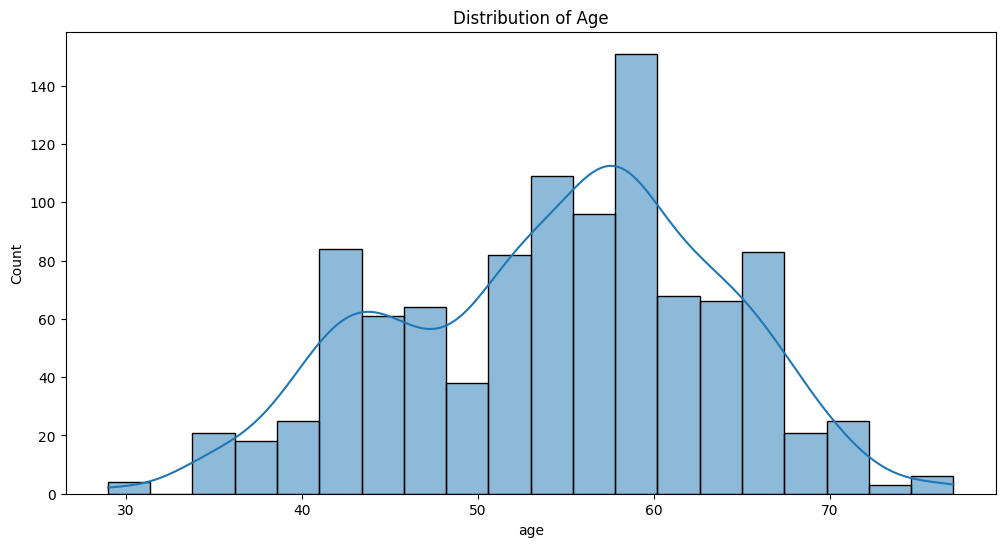

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='age', data=df, bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

***Visualize the distribution of cholesterol levels***

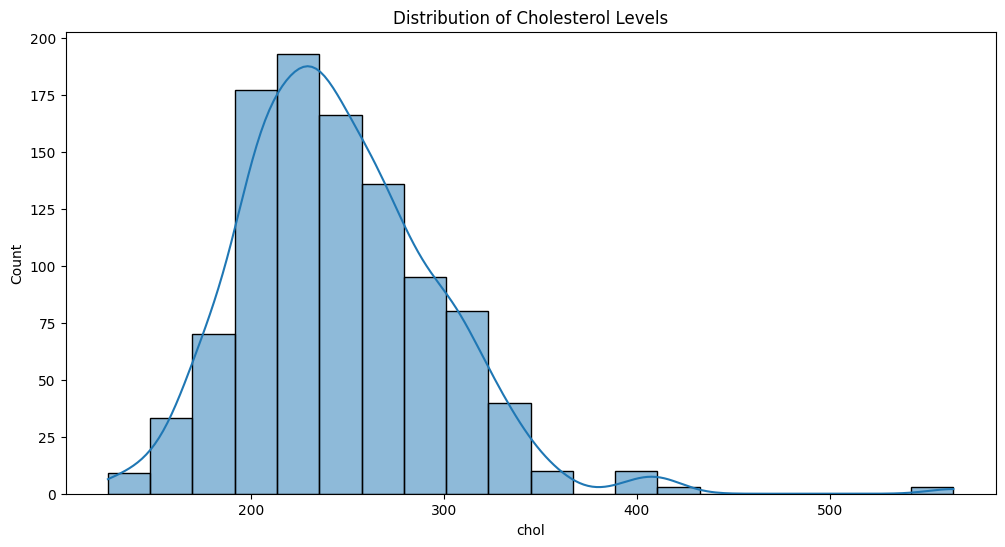

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='chol', data=df, bins=20, kde=True)
plt.title('Distribution of Cholesterol Levels')
plt.show()

**Checking whether dataset has null or empty values.**


Null values lead to biased representation and other quality issues.

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# **Data preprocessing:**

**Encoding:**


  Encoding is necessary when working with machine learning algorithms that require numerical input, as these algorithms typically operate on numerical data rather than categorical data. If you don't encode categorical variables, the model might misinterpret the categories as ordinal or introduce biases that could affect the performance of your model.

**Get dummies method:**

   **'pd.get_dummies()'** method is used for one-hot encoding. It creates binary columns for each category and indicates the presence of the category with a 1, and absence with a 0. This ensures that the model doesn't interpret numerical values assigned during encoding as having ordinal relationships.

In [ ]:

# Encode categorical variables
heart_data = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

heart_data.head()


,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


**Train Test split**

We used train_test_split from scikit-learn to split the data into training and testing sets. This is essential to assess how well the model performs on unseen data.

**'test_size'** helps us divide the usage for test & training.

In the provided code, 'test_size=0.2' means that 20% of the data will be used for testing, and the remaining 80% will be used for training.
**'random_state'** helps us to ensures reproducibility. If you use the same random seed, you'll get the same train-test split every time you run the code.


The choice of 'random_state' can be any integer, using 42 is a convention, but you could use any other integer.

<font color="#99ccff">*Choice is ours, based on the dataset we can decide.*</font>

In [ ]:
X = heart_data.drop('target', axis=1)#dropping target column for machine learning.
y = heart_data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Machine Learning Algorithms**

This following algorithms involve these following steps.

▶ We import the Machine Learning algorithms from scikit-learn, along with some metrics for evaluation *(accuracy_score, confusion_matrix, classification_report)*.

▶ The model is initialized *(random_state=42)*, and then trained using fit on the training data.we can use any random integer for random state, here we use 42.

▶ Predictions are made on the testing data using predict.

▶ Finally, we evaluate the model's performance using accuracy, confusion matrix, and a classification report.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

<font size=5px>Logistic Regression:</font>

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lr = logreg_model.predict(X_test)

# Evaluate the performance of the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
classification_rep_lr = classification_report(y_test, y_pred_lr)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Here comes the classification report
print("\nClassification Report:\n", classification_rep_lr)

#Here come the accuracy
print(f"Accuracy: {accuracy_lr:.4f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.75      0.80       102
           1       0.78      0.87      0.82       103

    accuracy                           0.81       205
   macro avg       0.81      0.81      0.81       205
weighted avg       0.81      0.81      0.81       205

Accuracy: 0.8098


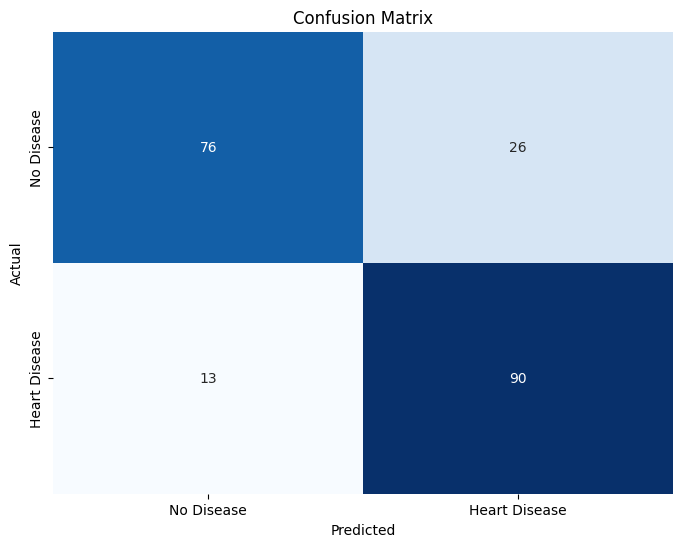

In [ ]:
# Create a heatmap for the confusion matrix for better visualizing in representation
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Disease', 'Heart Disease'],
            yticklabels=['No Disease', 'Heart Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<font size=5px>Decision Tree:</font>


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the performance of the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

In [ ]:
# Display the results
print("\nClassification Report (Decision Tree):\n", classification_rep_dt)
print(f"Decision Tree Accuracy:{accuracy_dt:.4f}")


Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Decision Tree Accuracy:0.9854


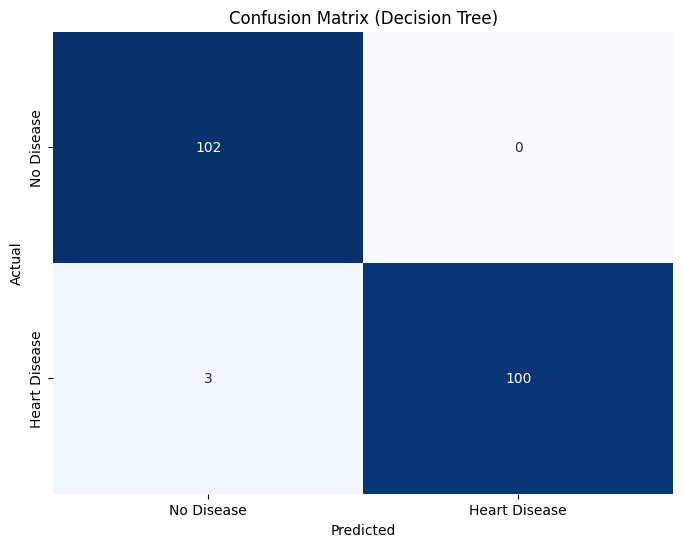

In [ ]:
# Create a heatmap for the confusion matrix of the Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Disease', 'Heart Disease'],
            yticklabels=['No Disease', 'Heart Disease'])
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


<font size=5px>Random Forest Classifier:</font>


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the performance of the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

In [ ]:
# Display the results
print("\nClassification Report (Random Forest):\n", classification_rep_rf)
print(f"Random Forest Accuracy:{accuracy_rf:.4f}")


Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Random Forest Accuracy:0.9854


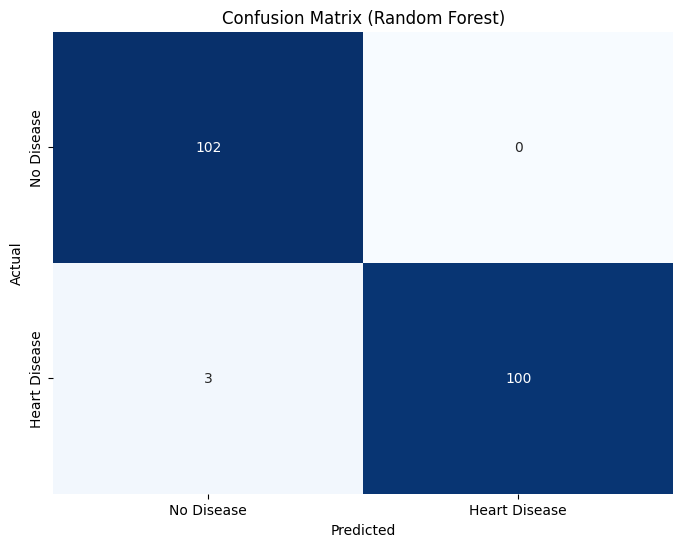

In [ ]:
# Create a heatmap for the confusion matrix of the Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Disease', 'Heart Disease'],
            yticklabels=['No Disease', 'Heart Disease'])
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<font size=5px>Support Vector Machine:</font>

In [ ]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine (SVM) model
svm_model = SVC(random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the performance of the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)


In [ ]:
# Display the results
print("\nClassification Report (SVM):\n", classification_rep_svm)
print(f"SVM Accuracy:{accuracy_svm:.4f}")


Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.70      0.61      0.65       102
           1       0.66      0.75      0.70       103

    accuracy                           0.68       205
   macro avg       0.68      0.68      0.68       205
weighted avg       0.68      0.68      0.68       205

SVM Accuracy:0.6780


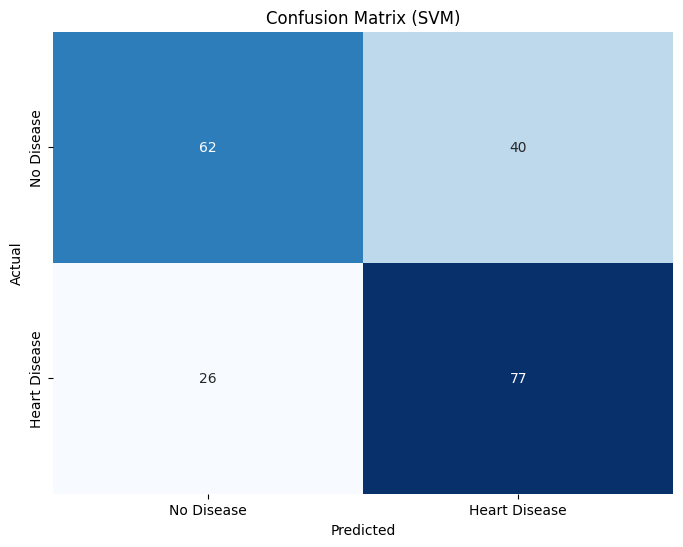

In [ ]:
# Create a heatmap for the confusion matrix of the SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Disease', 'Heart Disease'],
            yticklabels=['No Disease', 'Heart Disease'])
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


<font size=5px>K-NeighborsClassifier:</font>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_knn = knn_model.predict(X_test)

# Evaluate the performance of the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

In [ ]:
# Display the results
print("\nClassification Report (KNN):\n", classification_rep_knn)
print(f"KNN Accuracy:{accuracy_knn:.4f}")


Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       102
           1       0.73      0.74      0.73       103

    accuracy                           0.73       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.73      0.73      0.73       205

KNN Accuracy:0.7317


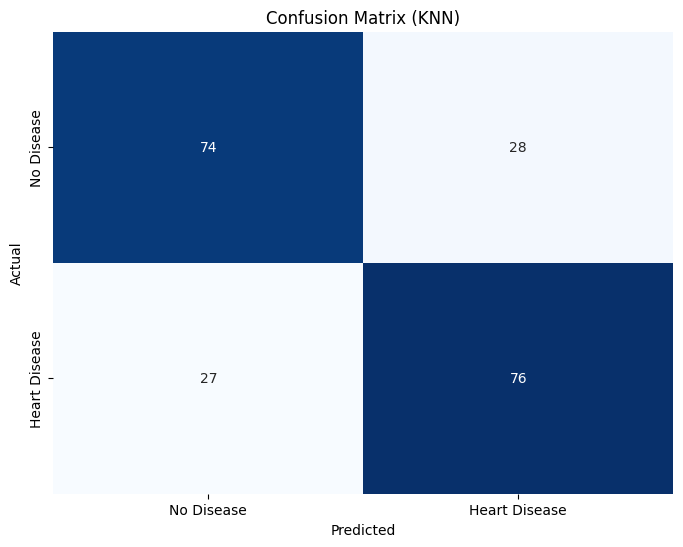

In [ ]:

# Create a heatmap for the confusion matrix of the KNN
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Disease', 'Heart Disease'],
            yticklabels=['No Disease', 'Heart Disease'])
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **Model Comparison**

**Visualizing for Comparison**

<ipython-input-85-c41876980eba>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


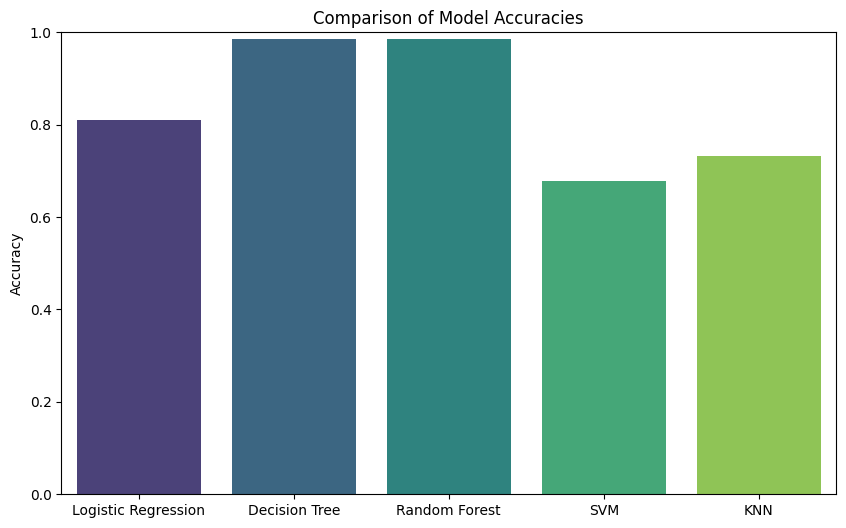

In [ ]:
# Create a bar chart for model accuracies
models = ['Logistic Regression','Decision Tree', 'Random Forest', 'SVM','KNN']
accuracies = [accuracy_lr,accuracy_dt, accuracy_rf, accuracy_svm,accuracy_knn]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0, 1)  # Set y-axis limits to represent accuracy percentage
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.show()

<font size=5px>Classification Evaluation Metrics</font>

Following metrics provide insights into how well a classification model is performing beyond just accuracy.

    Accuracy = (TP + TN) / (TP + TN + FP + FN)

1.   **Precision:**

    *   Precision is the ratio of true positive predictions to the total predicted positives.

    *   It measures the accuracy of positive predictions, indicating how many of the predicted positive instances are actually positive.   


    Precision = TP / (TP + FP)

2.   **Recall** (Sensitivity or True Positive Rate):

     *   Recall is the ratio of true positive predictions to the total actual positives.

     *   It measures the ability of the model to capture all positive instances, indicating how many of the actual positive instances are correctly predicted.

  
    Recall = TP / (TP + FN)

3.  **F1score:**
     *   The F1 score is the harmonic mean of precision and recall.

     *   It provides a balance between precision and recall, giving a single metric that considers both false positives and false negatives.


    F1score=2 * (Precision * Recall)/(Precision + Recall)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Define a function to calculate and display additional metrics
def display_additional_metrics(y_true, y_pred, model_name):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\nAdditional Metrics for {model_name}:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Display additional metrics for each model
display_additional_metrics(y_test, y_pred_lr, 'Logistic Regression')
display_additional_metrics(y_test, y_pred_dt, 'Decision Tree')
display_additional_metrics(y_test, y_pred_rf, 'Random Forest')
display_additional_metrics(y_test, y_pred_svm, 'SVM')
display_additional_metrics(y_test, y_pred_knn, 'KNN')



Additional Metrics for Logistic Regression:
Precision: 0.7759
Recall: 0.8738
F1 Score: 0.8219

Additional Metrics for Decision Tree:
Precision: 1.0000
Recall: 0.9709
F1 Score: 0.9852

Additional Metrics for Random Forest:
Precision: 1.0000
Recall: 0.9709
F1 Score: 0.9852

Additional Metrics for SVM:
Precision: 0.6581
Recall: 0.7476
F1 Score: 0.7000

Additional Metrics for KNN:
Precision: 0.7308
Recall: 0.7379
F1 Score: 0.7343


# **Hyper Tuning**

 Hyperparameters are configuration settings for a model that are not learned from the data but need to be set before training.